In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


In [4]:
data = pd.read_csv(r'C:\Users\vmadmin\Documents\ML App\Pokemon.csv')


In [5]:
#DATA TRANSFORMATION PIPELINE 
#sequentially apply transformers then an estimator

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.pipeline import make_pipeline


numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='mean'))])
categorical_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='constant')), ('encoder', OrdinalEncoder())])



In [6]:
#pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', ???? kmeans)])

In [7]:
from sklearn.preprocessing import StandardScaler
skills = ['HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed']
scaler = StandardScaler()
fitted_scaler = scaler.fit_transform(data[skills])


In [8]:
from sklearn.cluster import KMeans

inertia = []
for cluster in range(1, 15):
    kmeans = KMeans(n_clusters=cluster, init="k-means++", random_state=49, n_init=100)
    kmeans.fit(fitted_scaler)
    inertia.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow Chart to Select K')

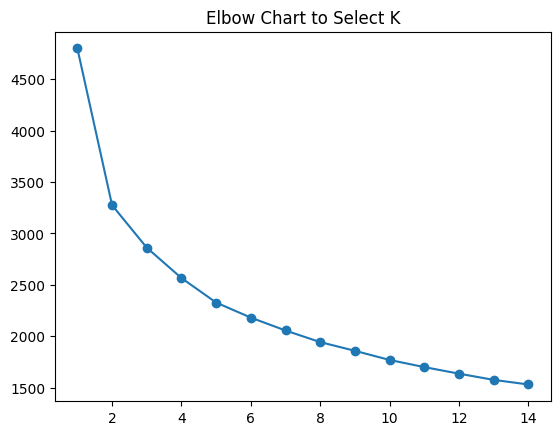

In [9]:
plt.plot(range(1,15), inertia)
plt.scatter(range(1,15), inertia)
plt.title('Elbow Chart to Select K')

In [10]:
# find clusters now using K selected based on chart above
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=49, n_init=100)
kmeans.fit(fitted_scaler)
data['cluster'] = kmeans.labels_

centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_))
centroids.columns = skills
centroids['cluster'] = [0, 1, 2, 3, 4]


C:\Users\vmadmin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
#sns.pairplot(data[['Total', 'HP', 'Attack', 'Defense','Sp. Atk', 'Sp. Def', 'Speed', "cluster"]], palette="colorblind" ,hue = "cluster");

In [12]:
data.groupby(['cluster']).agg({
    'HP': 'median', 
    'Attack': 'median', 
    'Defense': 'median', 
    'Sp. Atk': 'median', 
    'Sp. Def': 'median', 
    'Speed': 'median'
})

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
cluster,,,,,,
0,65.0,85.0,115.0,60.0,85.0,50.0
1,50.0,53.0,50.0,45.0,49.5,50.0
2,90.0,120.0,90.0,120.0,95.5,100.0
3,69.0,80.0,65.0,80.0,70.0,91.0
4,100.0,90.0,76.0,75.0,80.0,55.0


In [13]:
#kmeans.cluster_centers_

In [14]:
data.to_csv("PokemonClustered.csv", index=False)
# diff = kmeans.cluster_centers_ - np.array(#new data)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data[skills], data['cluster'], test_size=0.2)

In [16]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


y_pred = knn.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))
# initial accuracy is 92%, try to improve using cross validation

Accuracy:  0.88125


In [18]:
from sklearn.model_selection import cross_val_score


k_vals = [i for i in range (1, 30)]
scores=[]
X = scaler.fit_transform(data[skills])

for k in k_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, data['cluster'], cv=5)
    scores.append(np.mean(score))

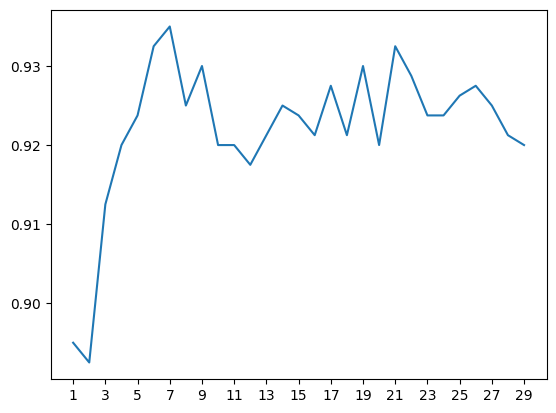

In [19]:
sns.lineplot(x=k_vals, y=scores).set_xticks(np.arange(1, 31, 2))
# best k value is 7

In [21]:
best_index = np.argmax(scores)
best_k = k_vals[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

print("accuracy: ", accuracy)
print("precision: ", precision) 
print("recall: ", recall)

accuracy:  0.90625
precision:  [0.94444444 0.96       0.95652174 0.81632653 0.9       ]
recall:  [0.77272727 1.         0.91666667 0.93023256 0.7826087 ]


In [22]:
pickle.dump(knn, open('classifier.pkl', 'wb'))